1. Dataset Used : https://www.kaggle.com/datasets/taejoongyoon/mitbit-arrhythmia-database/data

2. Data Organization

Each ECG record is stored as a CSV file containing:

>Sample index/
>MLII ECG signal/
>V1 ECG signal/

Corresponding annotation files contain:

>Time of beat occurrence/
>Sample number of R-peak

Beat type symbol (e.g., N, V, A, F, Q)

The sample number provided in the annotation file represents the exact location of the R-peak in the ECG signal.

3. Signal Selection

Only the MLII lead was selected for further processing. This decision was based on its widespread use in the literature and its ability to capture clear QRS complexes, which are essential for heartbeat classification.

4. Beat Segmentation (Feature Extraction)

Arrhythmia classification is a beat-level problem rather than a sample-level problem. Therefore, the ECG signal was segmented into individual heartbeats using R-peak locations obtained from the annotation files.

For each annotated R-peak:

A fixed-length window of ECG samples was extracted

The window included 200/180 samples before and 200/180 samples after the R-peak

This resulted in a beat segment of 400/360 samples

Each segmented beat represents a single feature vector describing the morphological characteristics of the heartbeat.

5. Beat Labeling

Each extracted heartbeat was assigned a class label based on the beat type symbol provided in the annotation file. The original MIT-BIH beat symbols were mapped into five AAMI-standard heartbeat classes:

Class 0: Normal beats (N, L, R, e, j)

Class 1: Supraventricular ectopic beats (A, a, J, S)

Class 2: Ventricular ectopic beats (V, E)

Class 3: Fusion beats (F)

Class 4: Unknown or paced beats (Q)

6. Classification Model

A Random Forest Classifier was employed for heartbeat classification. Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the most frequent class prediction. It is robust to noise, handles high-dimensional data effectively, and reduces overfitting through ensemble averaging.

Class weights were adjusted to address the imbalance in heartbeat classes.

In [1]:
# Accuracy achieved when Window is taken as 180 = 99.27360774818402

# Accuracy with Window as 200 = 99.63680387409201

In [2]:
wsmall = 99.27360774818402
wlarge = 99.63680387409201

In [3]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy in percent')

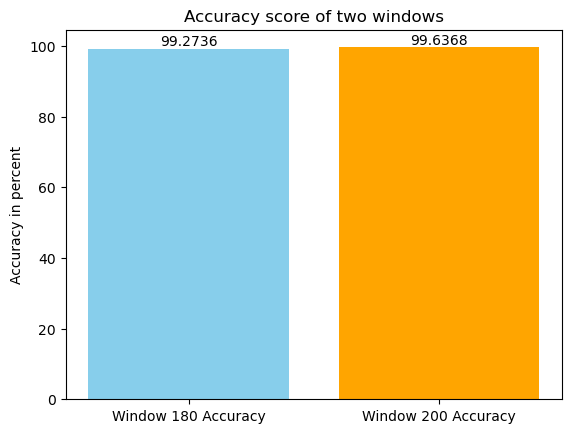

In [4]:
bars = plt.bar(['Window 180 Accuracy','Window 200 Accuracy'],[wsmall, wlarge],color= ['skyblue','orange'])
plt.title("Accuracy score of two windows")
plt.bar_label(bars)
plt.ylabel("Accuracy in percent")
